For potentiel 
$$ V_G(r) = 

\begin{cases}
V_m, &  r \le R, \\
\frac{2 (Z - 2)e^2}{r} ,  & r > R. \tag{8}
\end{cases}
$$

1. Region I (nucleus): $r < r_1:$  
$$\psi_I(r) = Ae^{ik_1r} + Be^{-ik_1r} $$

2. Region II (barrier): $ r_1 <= r <= r_2 $
$$\psi_{II}(r) = \frac{C'}{\sqrt{q(r)}} e^{ -\int q(r) dr} + \frac{D'}{\sqrt{q(r)}} e^{\int q(r) dr } $$

3. Region III (libre): $r \gg r_2:$
$$\psi_{III}(r) = Fe^{ik_3r} $$

where $ k_1 = \frac{\sqrt{2m(E-V_m)}}{\hbar} $,  $ k_3 = \frac{\sqrt{2mE}}{\hbar} $ and $q(r) = \frac{\sqrt{2m(V(r) - E)}}{\hbar}.$ 

$A = 1$ - incoming wave, $B$ - reflected wave, $C'$ is decaying amplitude under  and $F$ - transmitted wave amplitude

To find the coefficients A, B, C', D' and F we must have continuity of the wavefunction and its derivative:

$$ \psi_I(R) = \psi_{II}(R), \psi_I'(R) = \psi_{II}'(R) .$$
$$ \psi_{II}(R) = \psi_{III}(R), \psi_{II}'(R) = \psi_{III}'(R) .$$


Wavefunction continuity at $r = R$:  $$ Ae^{ik_1R} + Be^{-ik_1R}  = \frac{C + D}{\sqrt{q(R)}} ,$$

and derivative continuity at $r = R$ and under the condition weak change of the potential:

$$ ik_1 (A e^{ ik_1R } - B e^{-ik_1R})  = (-C' + D') \sqrt {q(R)} .$$

For bondary condition when ($r \sim r_2$) wave function continuity write as:

$$ Fe^{ik_3 r_2} = \frac{C'}{\sqrt{q(r_2)}} e^{ -\int_{R}^{r_2} q(r) dr} $$

when $D' = 0$ because the growing exponential cannot appear at large $r$ (it would diverge) and decay term $C'$ inside the barrier we can find from derivative continuity at $r = R$:


$$C' = 0.5 \left[ \sqrt{q(R)} (e^{ik_1R} + B e^{-ik_1R}) - \frac{ik_1}{\sqrt{q(R)}} (e^{ik_1R} - B e^{-ik_1R}) \right] $$

Transmission coefficient:

$$ T = \frac{k_3|F|^2}{k_1|A|^2} = \frac{k_3}{k_1}|C'|^2 e^{-2 \int_{r_1}^{r_2}q(r)dr} = \frac{k_3}{k_1} e^{ - \frac{2}{\hbar} \int_{r_1}^{r_2} 2 m\sqrt {[V(r) - E]} }$$

/tmp/ipykernel_354881/2813196232.py:55: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral, _ = quad(q_func, r_start, r_end)
/tmp/ipykernel_354881/2813196232.py:55: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral, _ = quad(q_func, r_start, r_end)


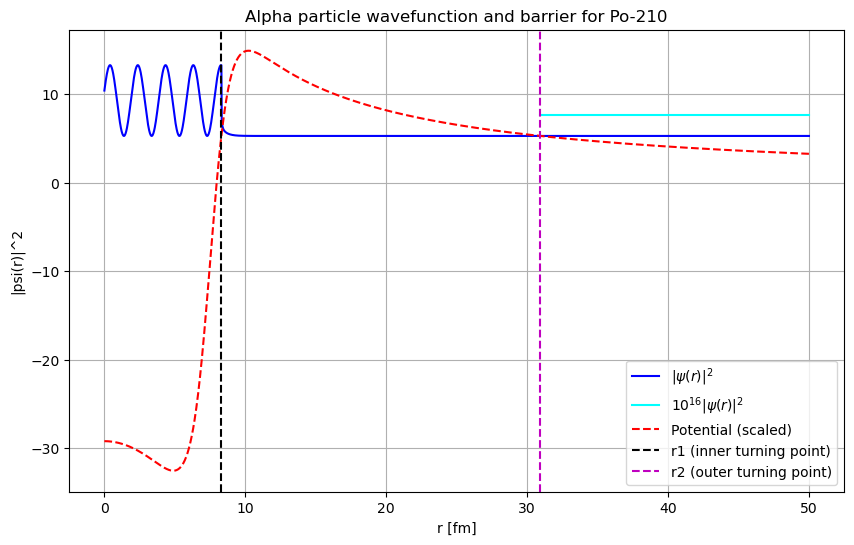

Transmission coefficient T = 2.33500e-16


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# -----------------------------
# Physical constants
# -----------------------------
hbar_c = 197.327  # MeV·fm
m_alpha = 3727.38  # MeV/c^2

# -----------------------------
# Nuclear parameters for Po-210
# -----------------------------
R = 7.5       # fm, nuclear radius
Z = 84        # proton number
V0 = 62       # MeV, Woods-Saxon depth
sigma = 0.68  # fm, diffuseness

# -----------------------------
# Radial grid
# -----------------------------
r_max = 50.0  # fm
r = np.linspace(0.01, r_max, 2000)

# -----------------------------
# Woods-Saxon + Coulomb potential
# -----------------------------
V_WS = - V0 / (1 + np.exp((r - R)/sigma))

V_C = np.zeros_like(r)
cond = r <= R
V_C[cond] = 2*(Z-2)*(3*R**2 - r[cond]**2)/(2*R**3)
V_C[~cond] = 2*(Z-2)/r[~cond]

pot = V_WS + V_C

# -----------------------------
# Alpha particle energy
# -----------------------------
E = 5.3  # MeV
Vm = 0  # MeV
Vm = -8  # MeV

# -----------------------------
# Wave number in allowed region
# -----------------------------
k1 = np.sqrt(2*m_alpha*(E-Vm))/hbar_c  # Region I and III
k3 = np.sqrt(2*m_alpha*E)/hbar_c  # Region I and III

def q_func(r_val):
    Vr = np.interp(r_val, r, pot)
    return np.sqrt(np.maximum(0, 2*m_alpha*(Vr - E)))/hbar_c

def wkb_integral(r_start, r_end):
    integral, _ = quad(q_func, r_start, r_end)
    return integral

# -----------------------------
# Classical turning points
# -----------------------------
r1_index = np.where(pot >= E)[0][0]
r2_index = np.where(pot >= E)[0][-1]
r1 = r[r1_index]
r2 = r[r2_index]

# -----------------------------
# Coefficients
# -----------------------------
qR = q_func(r1)
if qR == 0:
    qR = 1e-12

A = 1.0
B = (1j*k1 + qR)/(1j*k1 - qR) * np.exp(2j*k1*r1)

C_prime = 0.5*( np.sqrt(qR)*(np.exp(1j*k1*r1) + B*np.exp(-1j*k1*r1)) 
               - (1j*k1/np.sqrt(qR))*(np.exp(1j*k1*r1) - B*np.exp(-1j*k1*r1)) )

S = wkb_integral(r1, r2)
F = C_prime * np.exp(-S)

# -----------------------------
# Wavefunctions
# -----------------------------
def psi_I(r_vals): 
    return A*np.exp(1j*k1*r_vals) + B*np.exp(-1j*k1*r_vals)

def psi_II(r_vals):
    integral = np.array([wkb_integral(r1, x) for x in r_vals])
    return C_prime / np.sqrt(np.maximum(q_func(r_vals),1e-12)) * np.exp(-integral)

def psi_III(r_vals): 
    return F*np.exp(1j*k3*r_vals)

# -----------------------------
# Combine for plotting
# -----------------------------
r_I = r[r <= r1]
r_II = r[(r>r1) & (r<=r2)]
r_III = r[r>r2]

P_I = np.abs(psi_I(r_I))**2
P_II = np.abs(psi_II(r_II))**2
P_III = np.abs(psi_III(r_III))**2

psi_sq = np.concatenate([P_I, P_II, P_III])
r_full = np.concatenate([r_I, r_II, r_III])

# -----------------------------
# Plot wavefunction + potential
# -----------------------------
plt.figure(figsize=(10,6))

# Plot |psi(r)|^2
plt.plot(r_full, E + 2*psi_sq, label=r'$|\psi(r)|^2$', color='blue')
plt.plot(r_III, E + 1e16 * P_III, label=r'$10^{16} |\psi(r)|^2$', color='cyan')

# Plot potential (scaled for visualization)
plt.plot(r, pot, label='Potential (scaled)', color='red', linestyle='--')

plt.axvline(r1, color='k', linestyle='--', label='r1 (inner turning point)')
plt.axvline(r2, color='m', linestyle='--', label='r2 (outer turning point)')

plt.xlabel('r [fm]')
plt.ylabel('|psi(r)|^2')
plt.title('Alpha particle wavefunction and barrier for Po-210')
plt.legend()
plt.grid(True)
plt.show()

# -----------------------------
# Transmission coefficient
# -----------------------------
T = np.abs(F)**2
print(f"Transmission coefficient T = {T:.5e}")


/tmp/ipykernel_1919838/3981185829.py:52: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral, _ = quad(q_func, r_start, r_end)
/tmp/ipykernel_1919838/3981185829.py:52: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral, _ = quad(q_func, r_start, r_end)


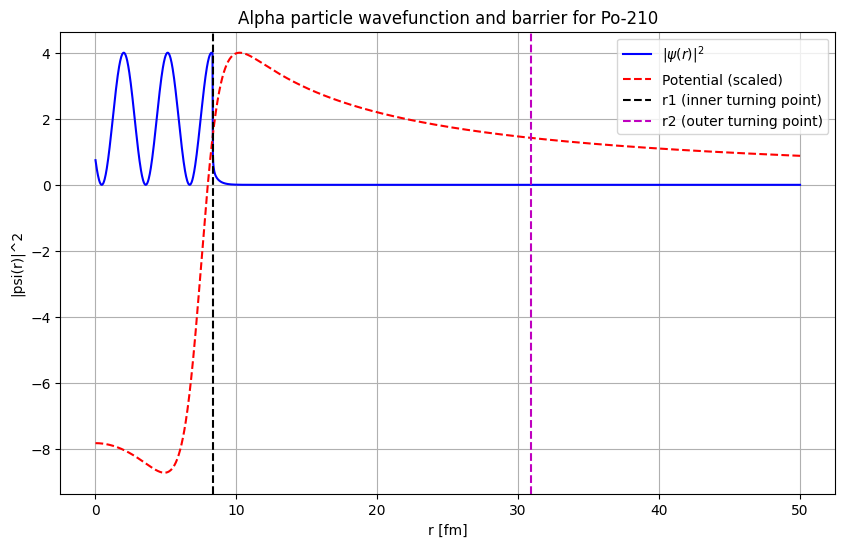

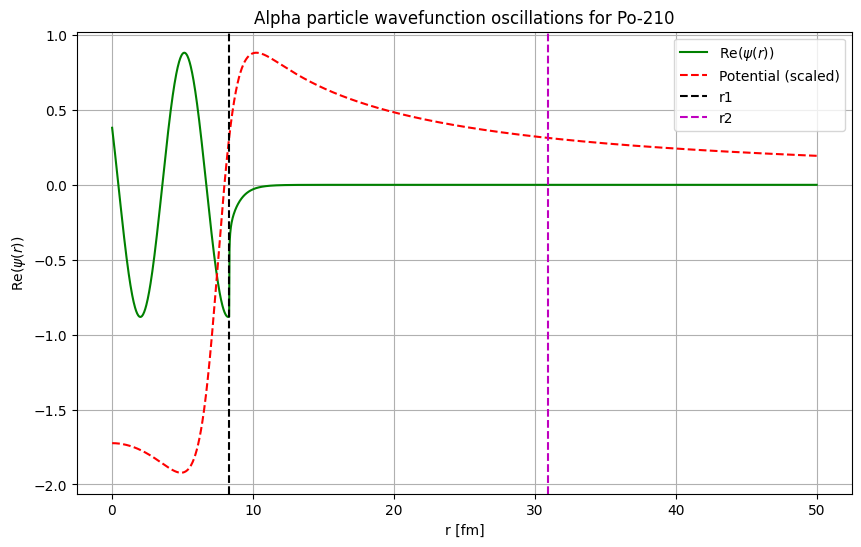

Transmission coefficient T = 2.32948e-16
Estimated half-life: 2.79e-06 s ≈ 0.00 days


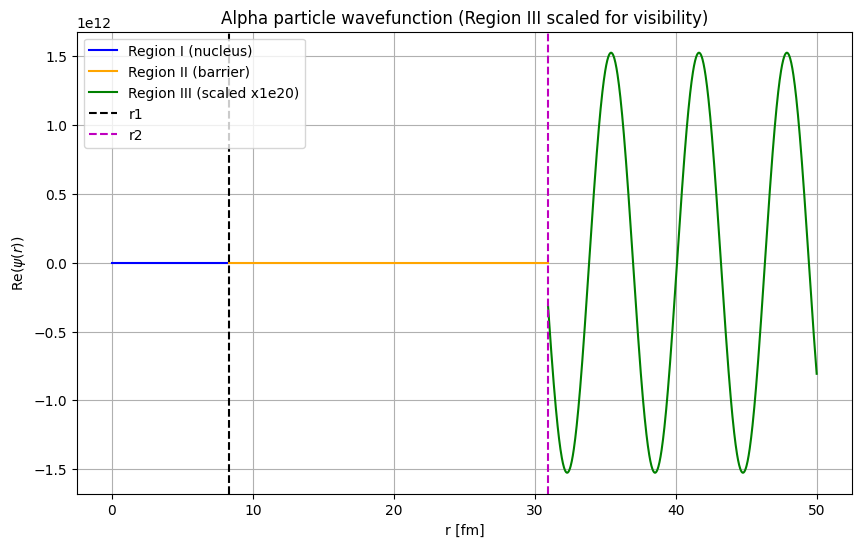

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# -----------------------------
# Physical constants
# -----------------------------
hbar_c = 197.327  # MeV·fm
m_alpha = 3727.38  # MeV/c^2

# -----------------------------
# Nuclear parameters for Po-210
# -----------------------------
R = 7.5       # fm, nuclear radius
Z = 84        # proton number
V0 = 62       # MeV, Woods-Saxon depth
sigma = 0.68  # fm, diffuseness

# -----------------------------
# Radial grid
# -----------------------------
r_max = 50.0  # fm
r = np.linspace(0.01, r_max, 2000)

# -----------------------------
# Woods-Saxon + Coulomb potential
# -----------------------------
V_WS = - V0 / (1 + np.exp((r - R)/sigma))

V_C = np.zeros_like(r)
cond = r <= R
V_C[cond] = 2*(Z-2)*(3*R**2 - r[cond]**2)/(2*R**3)
V_C[~cond] = 2*(Z-2)/r[~cond]

pot = V_WS + V_C

# -----------------------------
# Alpha particle energy
# -----------------------------
E = 5.3  # MeV

# -----------------------------
# Wave number in allowed region
# -----------------------------
k = np.sqrt(2*m_alpha*E)/hbar_c  # Region I and III

def q_func(r_val):
    Vr = np.interp(r_val, r, pot)
    return np.sqrt(np.maximum(0, 2*m_alpha*(Vr - E)))/hbar_c

def wkb_integral(r_start, r_end):
    integral, _ = quad(q_func, r_start, r_end)
    return integral

# -----------------------------
# Classical turning points
# -----------------------------
r1_index = np.where(pot >= E)[0][0]
r2_index = np.where(pot >= E)[0][-1]
r1 = r[r1_index]
r2 = r[r2_index]

# -----------------------------
# Coefficients
# -----------------------------
qR = q_func(r1)
if qR == 0:
    qR = 1e-12

A = 1.0
B = (1j*k + qR)/(1j*k - qR) * np.exp(2j*k*r1)

C_prime = 0.5*( np.sqrt(qR)*(np.exp(1j*k*r1) + B*np.exp(-1j*k*r1)) 
               - (1j*k/np.sqrt(qR))*(np.exp(1j*k*r1) - B*np.exp(-1j*k*r1)) )

S = wkb_integral(r1, r2)
F = C_prime * np.exp(-S)

# -----------------------------
# Wavefunctions
# -----------------------------
def psi_I(r_vals): 
    return A*np.exp(1j*k*r_vals) + B*np.exp(-1j*k*r_vals)

def psi_II(r_vals):
    integral = np.array([wkb_integral(r1, x) for x in r_vals])
    return C_prime / np.sqrt(np.maximum(q_func(r_vals),1e-12)) * np.exp(-integral)

def psi_III(r_vals): 
    return F*np.exp(1j*k*r_vals)

# -----------------------------
# Combine for plotting
# -----------------------------
r_I = r[r <= r1]
r_II = r[(r>r1) & (r<=r2)]
r_III = r[r>r2]

psi_sq = np.concatenate([
    np.abs(psi_I(r_I))**2,
    np.abs(psi_II(r_II))**2,
    np.abs(psi_III(r_III))**2
])
r_full = np.concatenate([r_I, r_II, r_III])

# -----------------------------
# Figure 1: Wavefunction squared + potential scaled
# -----------------------------
plt.figure(figsize=(10,6))
plt.plot(r_full, psi_sq, label=r'$|\psi(r)|^2$', color='blue')
plt.plot(r, pot/np.max(pot)*np.max(psi_sq), label='Potential (scaled)', color='red', linestyle='--')
plt.axvline(r1, color='k', linestyle='--', label='r1 (inner turning point)')
plt.axvline(r2, color='m', linestyle='--', label='r2 (outer turning point)')
plt.xlabel('r [fm]')
plt.ylabel('|psi(r)|^2')
plt.title('Alpha particle wavefunction and barrier for Po-210')
plt.legend()
plt.grid(True)
plt.show()

# -----------------------------
# Figure 2: Wavefunction real part to see oscillations in Region III
# -----------------------------
psi_real = np.concatenate([
    np.real(psi_I(r_I)),
    np.real(psi_II(r_II)),
    np.real(psi_III(r_III))
])

plt.figure(figsize=(10,6))
plt.plot(r_full, psi_real, label=r'Re($\psi(r)$)', color='green')
plt.plot(r, pot/np.max(pot)*np.max(np.abs(psi_real)), label='Potential (scaled)', color='red', linestyle='--')
plt.axvline(r1, color='k', linestyle='--', label='r1')
plt.axvline(r2, color='m', linestyle='--', label='r2')
plt.xlabel('r [fm]')
plt.ylabel('Re($\psi(r)$)')
plt.title('Alpha particle wavefunction oscillations for Po-210')
plt.legend()
plt.grid(True)
plt.show()

# -----------------------------
# Transmission coefficient
# -----------------------------
T = np.abs(F)**2
print(f"Transmission coefficient T = {T:.5e}")

# Alpha particle velocity inside nucleus (fm/s)
v = np.sqrt(2 * E / m_alpha) * 3e23  # c ~ 3e23 fm/s

# Attempt frequency: particle crosses nuclear diameter 2R
f_attempt = v / (2 * R)  # s^-1

# Decay constant
lambda_decay = f_attempt * T

# Half-life
t_half_sec = np.log(2) / lambda_decay        # in seconds
t_half_days = t_half_sec / (3600*24)        # in days

print(f"Estimated half-life: {t_half_sec:.2e} s ≈ {t_half_days:.2f} days")

# Scale Region III for visibility
scale_factor = 1e20  # adjust depending on T
psi_III_scaled = np.real(psi_III(r_III)) * scale_factor

plt.figure(figsize=(10,6))
plt.plot(r_I, np.real(psi_I(r_I)), color='blue', label='Region I (nucleus)')
plt.plot(r_II, np.real(psi_II(r_II)), color='orange', label='Region II (barrier)')
plt.plot(r_III, psi_III_scaled, color='green', label='Region III (scaled x1e20)')
plt.xlabel('r [fm]')
plt.ylabel('Re($\psi(r)$)')
plt.title('Alpha particle wavefunction (Region III scaled for visibility)')
plt.axvline(r1, color='k', linestyle='--', label='r1')
plt.axvline(r2, color='m', linestyle='--', label='r2')
plt.legend()
plt.grid(True)
plt.show()
